# **Problem set 2** - Machine Learning for Physics and Astronomy 2023/2024, UvA
---




- The total sheet gives 26 points
- Deadline for submitting your results is **Wed 17/04/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

## Chapter 3: Inference and Bayes nets (16 points)

### 3.1 Inverse Sampling (2 points)

*Topics: Inverse transform sampling*

**Reading material: Murphy 23.2.1**

(2 points) Consider the target exponential pdf $p(x)=\lambda e^{-\lambda x}$, where $\lambda$ is the rate parameter. Define a function that, using the inverse transform method, generates samples from the exponential distribution.

Choosing $\lambda =0.5$ and a sample size of $1000$, plot the histogram of the sampled data and overlay the theoretical exponential distribution curve on top.

Hint: You will need to use the function `np.random.uniform`

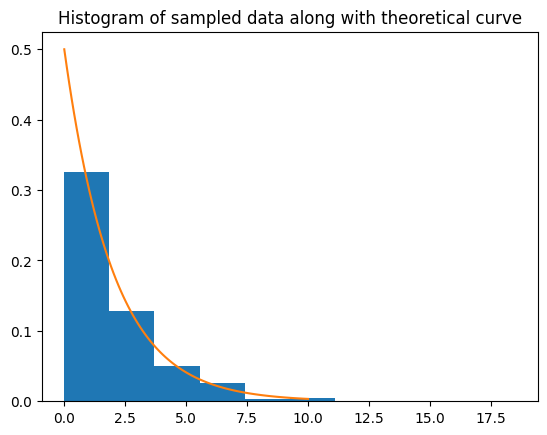

In [ ]:
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt
def inverse_transform(rate, sample_size):
  unisamples = uniform(low=0.0,high=1.0,size=sample_size)
  hist = -1/rate * np.log(unisamples)
  x = np.linspace(0,10,100)
  fx = rate * np.exp(-rate*x)
  plt.hist(hist,density=True)
  plt.plot(x,fx)
  plt.title('Histogram of sampled data along with theoretical curve')
  plt.show()
  return

inverse_transform(0.5,1000)

Usage of AI: None, but collaborated with Karan Kumar. Did not copy code, just discussed the idea.

### 3.2 Metropolis Hastings & credible intervals (10 points)



*Topics: Multivariate normal, Metropolis Hastings and marginal distributionsm Credible intervals, Highest posterior density region*

**Reading material: Murphy 5.2.2, 5.2.2.1, 24.3**

We will explore a 2-dim and bimodal probability density function.

In [ ]:
# provided

# The likelihood function is given

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/((2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/((2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf


1. Write your own Metropolish Hastings algorithm. (4 points)

- The proposal distribution is supposed to be a $D=2$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array.
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

Sample run of Metropolis Hastings algorithm for N=10000, σ=1.0
Acceptance rate for proposal width σ= 1.0 is 0.4607


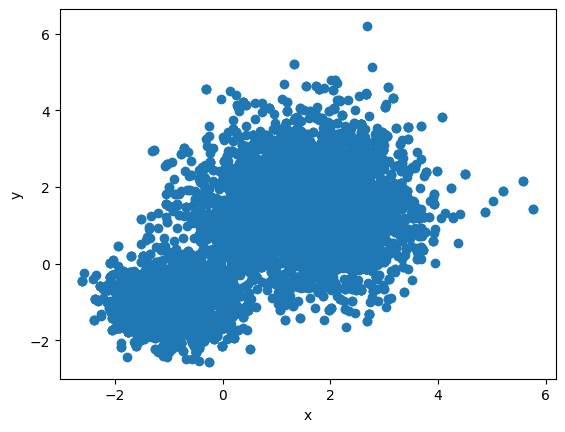

In [ ]:
def proposal_pdf(x,sigma):
    return x+np.random.randn(len(x))*sigma

def MetropolisHastings(pdf, N, x_init, sigma):

    D = len(x_init)
    chain = np.zeros((N,D))
    current_x = np.array(x_init)
    current_likelihood = pdf_bimodal(current_x)
    accepted_transitions = 0
    for s in range(0,N):
      xprime = proposal_pdf(current_x,sigma)
      acceptance_ratio = pdf_bimodal(xprime)/pdf_bimodal(current_x)
      acceptance_probability= min(1,acceptance_ratio)
      u = np.random.rand(1)
      if(u<=acceptance_probability):
        accepted_transitions+=1
        current_x = xprime
      chain[s] = current_x

    accepted_rate = accepted_transitions/N
    print('Acceptance rate for proposal width \u03C3=',sigma,'is',accepted_rate)
    return chain

print('Sample run of Metropolis Hastings algorithm for N=10000, \u03C3=1.0')
N=10000
x0 = [0,0]
sigma = 1.0
testchain = MetropolisHastings(proposal_pdf,N,x0,sigma)
plt.scatter(testchain[:,0],testchain[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. Explore the above bimodal distribution. (3 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

Acceptance rate for proposal width σ= 0.01 is 0.9967


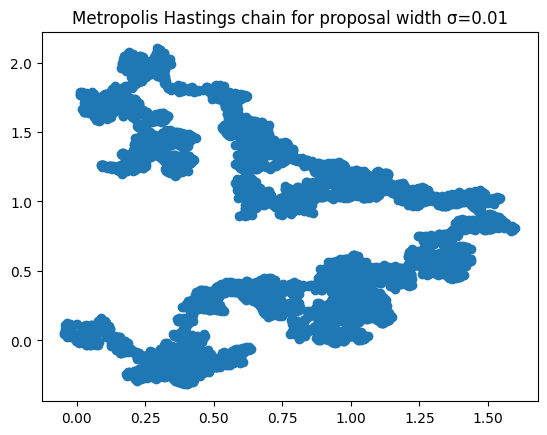

Acceptance rate for proposal width σ= 0.1 is 0.9262


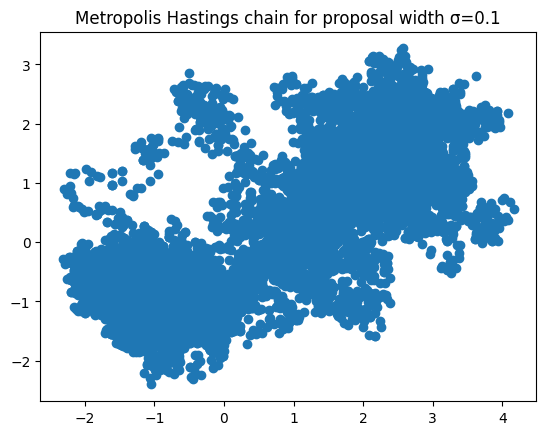

Acceptance rate for proposal width σ= 1.0 is 0.4336


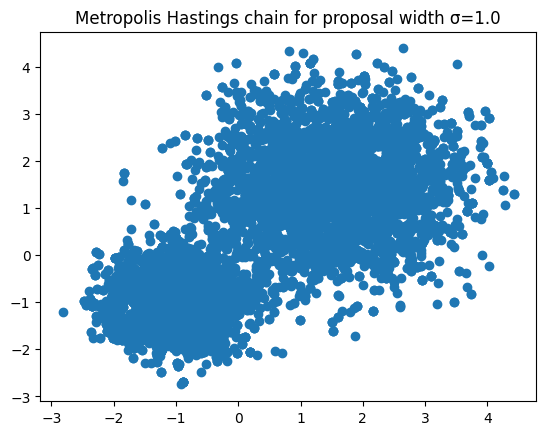

Acceptance rate for proposal width σ= 10.0 is 0.0174


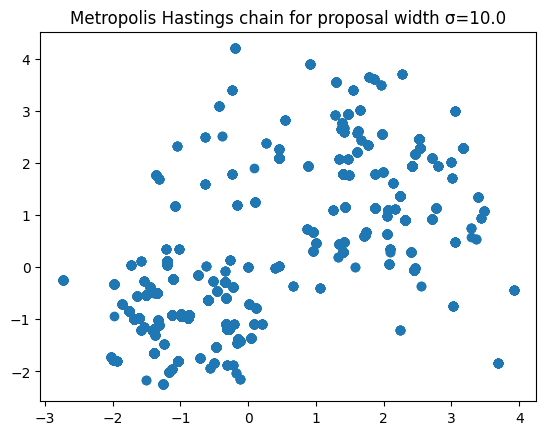

Acceptance rate for proposal width σ= 80.0 is 0.0004


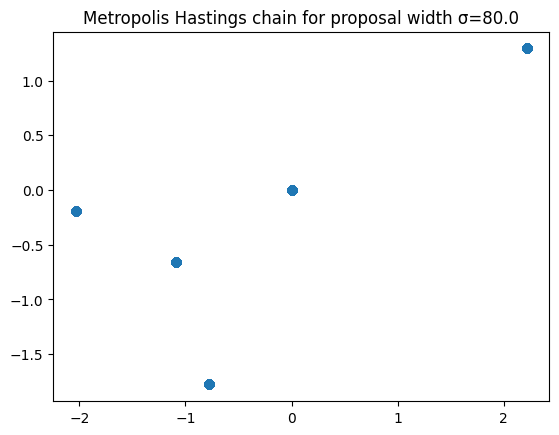

Acceptance rate for proposal width σ= 1.0 is 0.4506


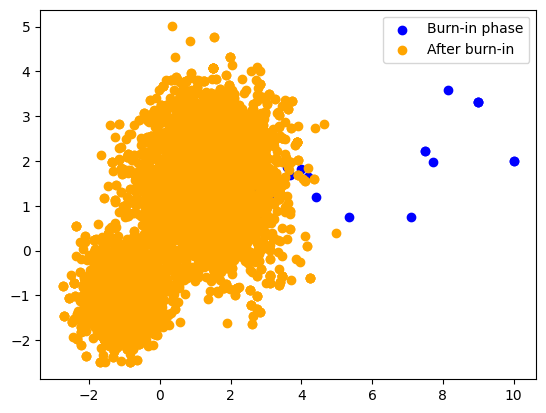

In [ ]:
# YOUR CODE HERE
proposalwidths = [0.01,0.1,1.0,10.0,80.0]
N = 10000
x0 = [0,0]
for sigma in proposalwidths:
  bimodalchain = MetropolisHastings(proposal_pdf,N,x0,sigma)
  plt.scatter(bimodalchain[:,0],bimodalchain[:,1])
  plt.title('Metropolis Hastings chain for proposal width \u03C3='+str(sigma))
  plt.show()


N=10000
x0 = [10,2]
sigma = 1.0
burninchain = MetropolisHastings(proposal_pdf,N,x0,sigma)
plt.scatter(burninchain[0:100,0],burninchain[0:100,1],color='blue',label='Burn-in phase')
plt.scatter(burninchain[100:,0],burninchain[100:,1],color='orange',label='After burn-in')
plt.legend()
plt.show()


From the scatter plots, we see that the sampled chain is most like the real distribution for 10000 samples and $\sigma=1.0$. There are 2 major clusters centred around (-1,-1) and (1.5,1.5). The acceptance rate is also reasonable (approximately 0.43). For high values of $\sigma$, the acceptance rate is extremely low and there are very few points sampled. The opposite is seen for low values, where there is an oversaturation of points as the acceptance criterion is quite lax. When the starting point is far away from the central region of the distribution (here, I have taken (10,2)), it takes a few iterations (approximately 100) to get to the right sampling region. This is the burn-in phase, indicated by the blue points in the last plot.

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (3 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?
- Define a function to generate the one dimensional highest posterior density intervals (HPDI) for both parameters at a certain credible level of a given probability density function. Then, calculate the HPDI for the given bimodal distribution at a $68.5\%$ credible level and plot your results.

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

Acceptance rate for proposal width σ= 0.01 is 0.9913


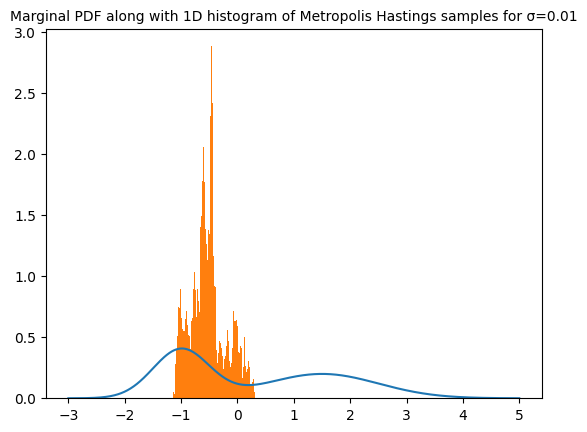

Acceptance rate for proposal width σ= 1.0 is 0.444


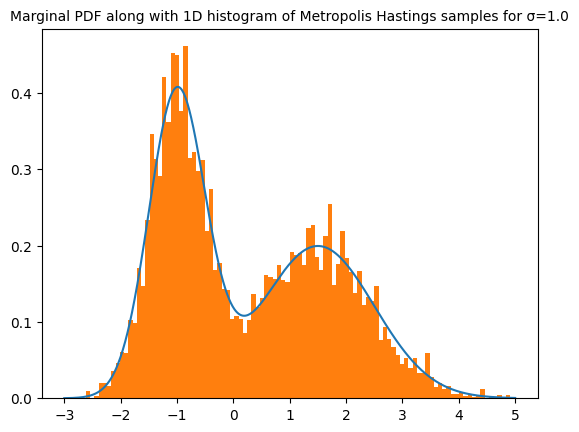

Acceptance rate for proposal width σ= 50.0 is 0.0008


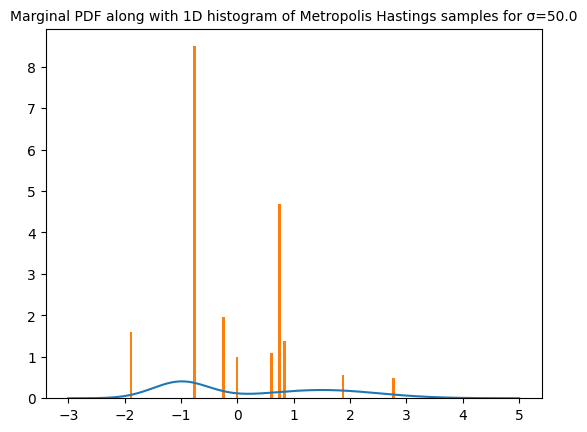

In [ ]:
def marginal_pdf(x):
    """Marginal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf

N = 10000
x0 = [0,0]
sigma_vals = [0.01,1.0,50.0]
for sigma in sigma_vals:
  chain_marginal = MetropolisHastings(proposal_pdf,N,x0,sigma)
  x_range = np.linspace(-3,5,1000)
  marginalplot = [marginal_pdf(xi) for xi in x_range]
  plt.plot(x_range,marginalplot)
  plt.hist(chain_marginal[:,0],bins=100,density=True)
  plt.title('Marginal PDF along with 1D histogram of Metropolis Hastings samples for \u03C3='+str(sigma),fontsize=10)
  plt.show()

The true distribution can be recovered for values of $\sigma$ close to 1 as this produces a proposal pdf that is close to the true distribution. This is also seen from the 1D histogram along with overlayed marginal distribution (for $x_1$ direction, although this is identical $x_2$ in this case as we have the same gaussian distribution along all directions).  
<br>
For low values of sigma, the pdf is highly concentrated and the density is much higher than the true distribution, while for high values the histogram is comprised of a few narrow peaks (almost like delta functions). This is in agreement with the previous scatterplots obtained for the different sigma values.

Usage of AI: Tried to use ChatGPT for Metropolis Hastings algorithm, but it didn't give me the right result. So I wrote the whole code myself but there may be some subconscious influence from AI.

### 3.3 Conditional independence and reparametrization (4 points)

*Topics: Independence and Conditional independence*

**Reading material: Murphy 10.1.2**

1. Reparametrization (2 points). In class we introduced the KL divergence
$$
D_{KL}(q \mid p) \equiv \int dx\; q(x) \ln\frac {q(x)}{p(x)}
$$
Show that it is reparametrization invariant, if we replace $x$ with another random variable $y = f(x)$, where $f(x)$ is strictly monotonic and differentiable.  Start by quoting $q(y)$ and $p(y)$ in terms of $q(x)$ and $p(x)$.

We know from the change of variables formula that $p(y) = p(x) |\frac{dx}{dy}|$
<br>
$D_{KL}(q'|p') = \int dx q(y) \frac{dy}{dx}ln \frac{q(y) \frac{dy}{dx}}{p(y) \frac{dy}{dx}} = \int dy q(y) ln \frac{q(y)}{p(y)} = D_{KL}(q|p)$ since it is effectively the same integrand with different 'dummy' variable.
<br>
Therefore, KL divergence is reparametrization invariant.


2. Conditional independence (2 points). Consider the graphical model defined by $p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$. Show explicitly, by using the relevant definitions, that
- $x$ and $z$ are conditionally independent given $y$
- $z$ and $x$ are conditionally independent given $y$

z and x are conditionally independent given y if
<br>
$$\forall x,y,z: p(x, z \mid y) = p(x \mid y) p(z \mid y)$$
The given graphical model is $p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$
<br>
Using Bayes' theorem, we know $p(z \mid y) p(y) = p(y \mid z) p(z)$
<br>
So, our model can be written as $p(x,y,z) = p(x \mid y) p(z \mid y) p(y)$
<br>
We also know $\frac{p(x,y,z)}{p(y)} = p(x,z \mid y)$
<br>
Therefore, our model is $p(x,z \mid y) = p(x \mid y) p(z \mid y)$, which is the requirement for conditional independence.
Hence, x and z are conditionally independent given y.

Usage of AI: None

## Chapter 4: Linear regression (10 points)


### 4.1  Regularized Regression (10 points)


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1. (2 points) $$\\ $$
Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

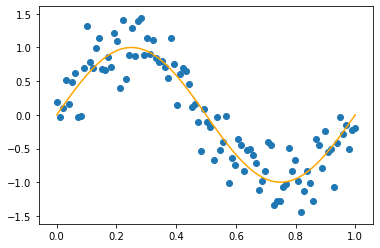

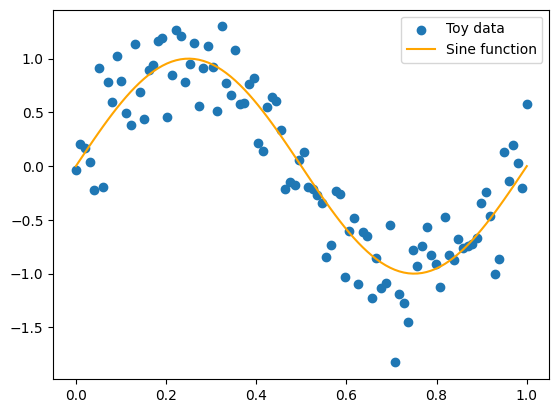

In [ ]:
def gen_sine(n):
  x = np.linspace(0,1,n)
  mu = np.sin(2*np.pi*x)
  t = np.random.normal(loc = mu, scale = 0.25)
  return x,t

x,test = gen_sine(100)
plt.scatter(x,test,label='Toy data')
plt.plot(x, np.sin(2*np.pi*x),color='orange',label='Sine function')
plt.legend()
plt.show()

2. (2 points) $$\\ $$  Write a method that finds the regularized $M$-th order polynomial for some fixed dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates.

In [ ]:
def regularized_polynomial_fit(x, y, M, lam):
    """
    Finds the regularized M-th order polynomial for a given dataset x.

    Parameters:
        x (array-like): Input data.
        y (array-like): Target values.
        M (int): Order of the polynomial.
        lam (float): Regularization weight.

    Returns:
        w (array): Maximum-likelihood parameter estimates.
    """
    # Construct the design matrix
    X = np.vander(x, M + 1, increasing=True)

    # Compute the ridge regression coefficients
    A = np.dot(X.T, X) + lam * np.eye(M + 1)
    b = np.dot(X.T, y)
    w = np.linalg.solve(A, b)

    return w

3. (2 point) $$\\ $$  Use your ``` gen_sine``` method to generate 25 datapoints as "training set", and another 25 datapoints as "test set", under the same conditions as before.  Then, fit polynomials of $M \in (0,2,3,9, 20)$ for values $\lambda = 0$ (unregularized case) to your test set. Plot your results, showing the polynomials, the test and the training set simultaneously.

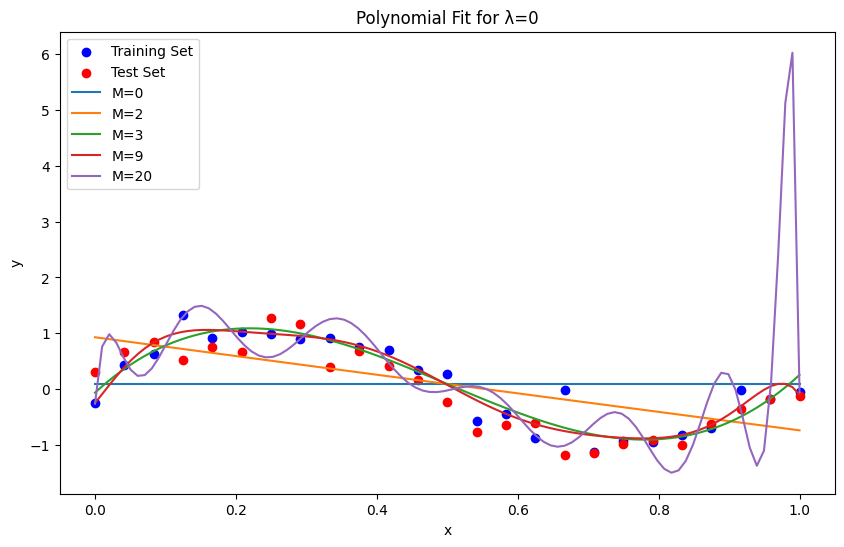

In [ ]:
def plot_polynomial_fit(x_train, y_train, x_test, y_test, M_values, lam=0):
    """
    Plot the polynomial fit results.

    Parameters:
        x_train (array-like): Training input data.
        y_train (array-like): Training target values.
        x_test (array-like): Test input data.
        y_test (array-like): Test target values.
        M_values (list): List of polynomial orders to fit.
        lam (float): Regularization weight.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Training Set')
    plt.scatter(x_test, y_test, color='red', label='Test Set')

    for M in M_values:
        # Fit polynomial to training data
        w = regularized_polynomial_fit(x_train, y_train, M, lam)
        X_train = np.vander(x_train, M + 1, increasing=True)
        y_train_pred = np.dot(X_train, w)

        # Fit polynomial to test data
        X_test = np.vander(x_test, M + 1, increasing=True)
        y_test_pred = np.dot(X_test, w)

        # Plot the fitted polynomial
        x_range = np.linspace(0, 1, 100)
        y_range_pred = np.dot(np.vander(x_range, M + 1, increasing=True), w)
        plt.plot(x_range, y_range_pred, label=f'M={M}')

    plt.title('Polynomial Fit for λ='+str(lam))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Fit polynomials of orders M in {0, 2, 3, 9, 20} to the training set
M_values = [0, 2, 3, 9, 20]
x_train, t_train = gen_sine(25)
x_test, t_test = gen_sine(25)
plot_polynomial_fit(x_train, t_train, x_test, t_test, M_values, lam=0)

4. (2 points)

  For the above fits with $\lambda=0$ (unregularized case) calculate the reduced chi-squared statistics for each $M$ both for the training and the test set.
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Plot the $\chi^2$ values for both training and test set as function of $M$. What do you observe?

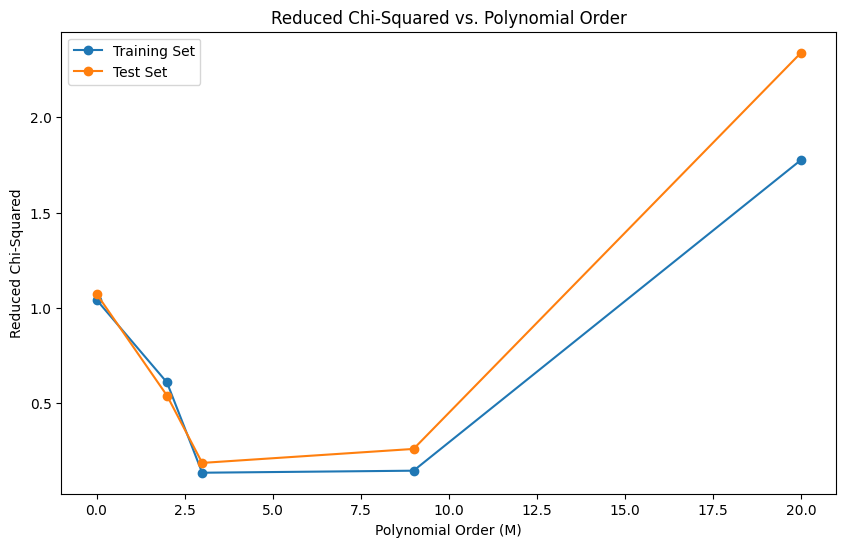

In [ ]:
def chi_squared(observed, calculated, variance):
    """
    Calculate the chi-squared statistic.

    Parameters:
        observed (array-like): Observed values.
        calculated (array-like): Calculated values (predicted by the model).
        variance (array-like): Variance of the measurement.

    Returns:
        chi_squared (float): The chi-squared statistic.
    """
    return np.sum(((observed - calculated) ** 2) / variance)

def reduced_chi_squared(observed, calculated, variance, num_params):
    """
    Calculate the reduced chi-squared statistic.

    Parameters:
        observed (array-like): Observed values.
        calculated (array-like): Calculated values (predicted by the model).
        variance (array-like): Variance of the measurement.
        num_params (int): Number of parameters in the model.

    Returns:
        reduced_chi_squared (float): The reduced chi-squared statistic.
    """
    N = len(observed)
    return chi_squared(observed, calculated, variance) / (N - num_params)

def plot_chi_squared(x_train, y_train, x_test, y_test, M_values, lam=0,plot=1):
    """
    Plot the reduced chi-squared values for both training and test sets as a function of M.

    Parameters:
        x_train (array-like): Training input data.
        y_train (array-like): Training target values.
        x_test (array-like): Test input data.
        y_test (array-like): Test target values.
        M_values (list): List of polynomial orders to fit.
        lam (float): Regularization weight.
    """
    train_reduced_chi_squared = []
    test_reduced_chi_squared = []

    for M in M_values:
        # Fit polynomial to training data
        w_train = regularized_polynomial_fit(x_train, y_train, M, lam)
        X_train = np.vander(x_train, M + 1, increasing=True)
        y_train_pred = np.dot(X_train, w_train)
        train_reduced_chi_squared.append(reduced_chi_squared(y_train, y_train_pred, np.var(y_train), M + 1))

        # Fit polynomial to test data
        X_test = np.vander(x_test, M + 1, increasing=True)
        y_test_pred = np.dot(X_test, w_train)
        test_reduced_chi_squared.append(reduced_chi_squared(y_test, y_test_pred, np.var(y_test), M + 1))
    if (plot==1):
      plt.figure(figsize=(10, 6))
      plt.plot(M_values, train_reduced_chi_squared, marker='o', label='Training Set')
      plt.plot(M_values, test_reduced_chi_squared, marker='o', label='Test Set')
      plt.title('Reduced Chi-Squared vs. Polynomial Order')
      plt.xlabel('Polynomial Order (M)')
      plt.ylabel('Reduced Chi-Squared')
      plt.legend()
      plt.show()
    return train_reduced_chi_squared,test_reduced_chi_squared

# Plot reduced chi-squared values
chisquaredtrain,chisquaredtest= plot_chi_squared(x_train, t_train, x_test, t_test, M_values, lam=0)


We see that the reduced chi-squared is lowest for polynomial orders between 3 and 9. This aligns with our fits being best for M=3 and M=9. Before this, there is a near-linear decrease, and a drastic increase in reduce chi-squared after M=9. We also see the expected trend of test-set having a worse reduced chi-squared than training for most M values.

5. (2 point) $$\\ $$  For $M=9$, repeat the previous exercise, but instead of varying $M$ you now vary $\lambda\in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot and discuss your results.  What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


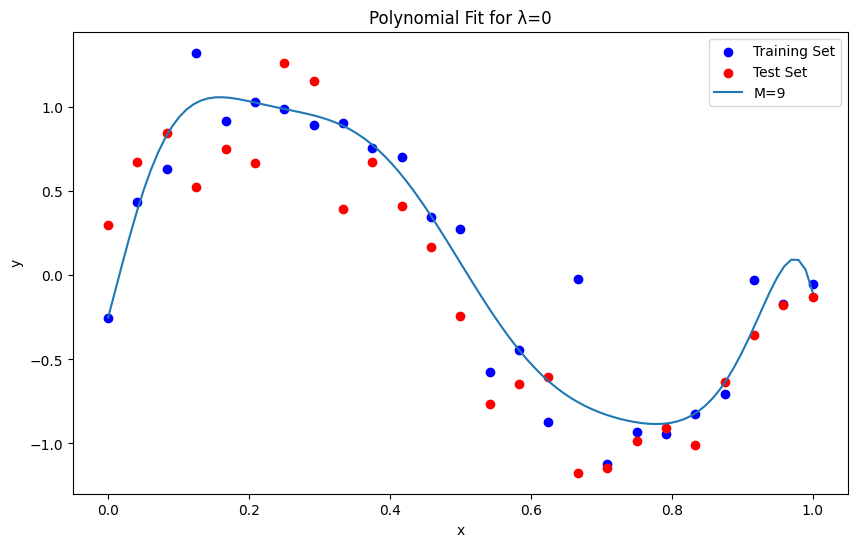

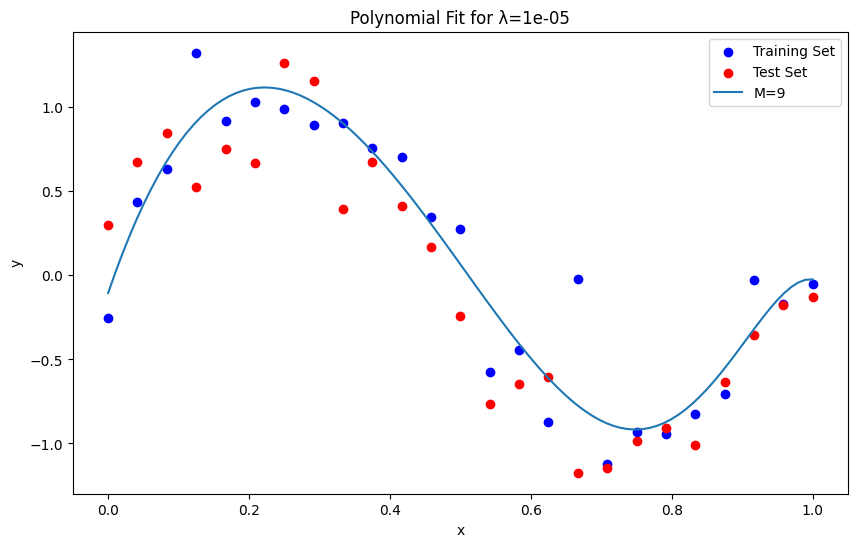

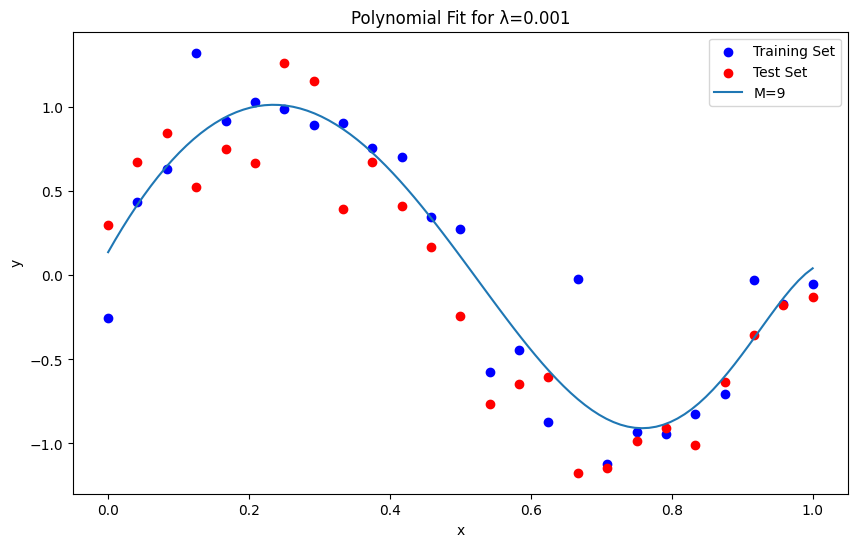

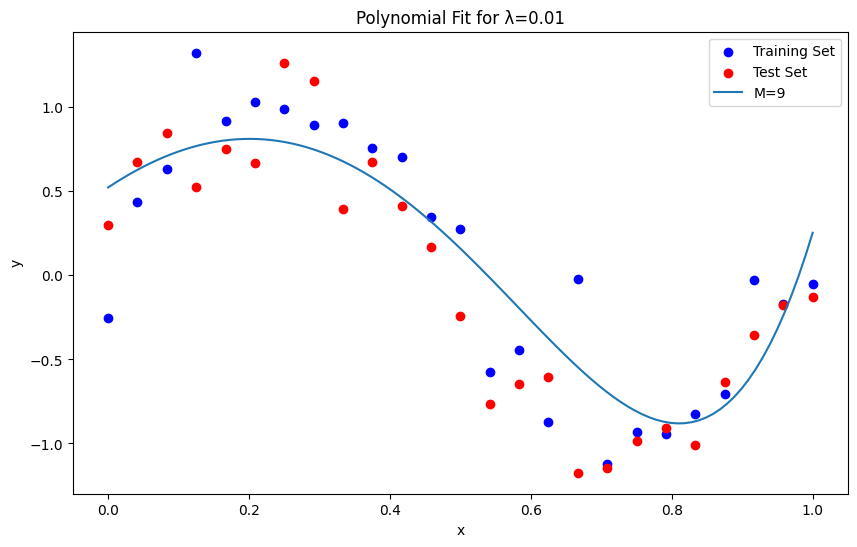

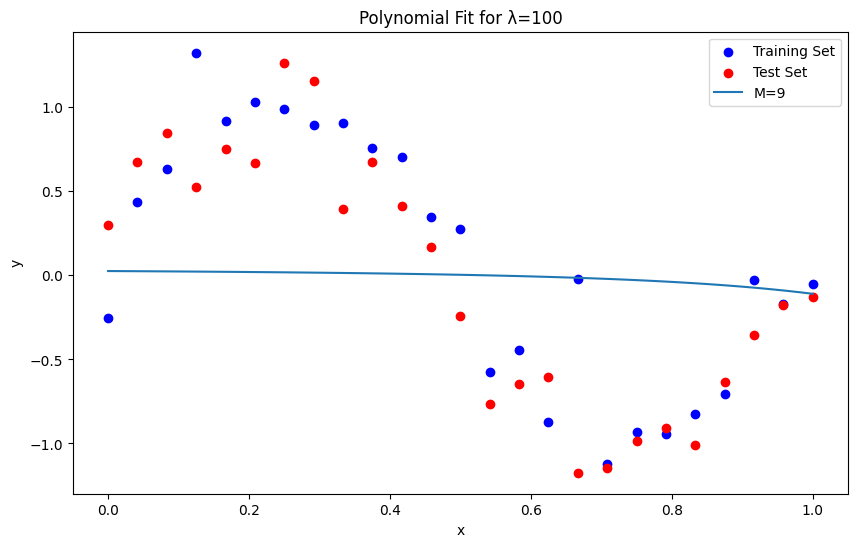

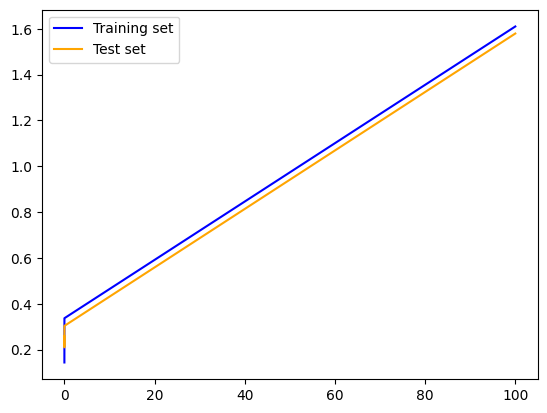

In [ ]:
lam_vals = [0,1e-5,1e-3,1e-2,100]
M = [9]
chisqtrain = []
chisqtest = []
for lam in lam_vals:
  plot_polynomial_fit(x_train, t_train, x_test, t_test, M, lam=lam)
  chisq1,chisq2 = plot_chi_squared(x_train,t_train,x_test,t_test,M,lam=lam,plot=0)
  chisqtrain.append(np.array(chisq1))
  chisqtest.append(np.array(chisq2))
plt.plot(lam_vals,chisqtrain,color='blue',label='Training set')
plt.plot(lam_vals,chisqtest,color='orange',label='Test set')
plt.legend()
plt.show()

As $λ$ increases, we see that the fit becomes worse and closer to a straight line. The maximum likelihood estimates are not good for values greater than 10. The best $λ$ seems to be 0.001 as the fit is good for both training and test data and reduced chi-squared is low but not an overfit.

Usage of AI: Used ChatGPT for the code of 4.2-4.4 pretty much entirely. The interpretations are my own.